In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the results of hyperparameter tuning

In [38]:
best_params = pd.read_csv('best_params_lr2.csv')
best_params = pd.DataFrame(best_params)
best_params_lr = best_params[['wasserstein_1d','config/gan/generator_lr','config/gan/discriminator_lr']]
best_params_lr.sort_values('wasserstein_1d')

,wasserstein_1d,config/gan/generator_lr,config/gan/discriminator_lr
497,-4.973906e+09,0.000011,0.099663
999,-6.030898e+08,0.000011,0.099588
508,-4.652679e+08,0.000011,0.099417
713,-4.227892e+08,0.000017,0.099747
883,-2.504708e+08,0.000015,0.099971
...,...,...,...
258,4.501258e+08,0.000015,0.089604
642,4.655711e+08,0.000010,0.099784
48,5.817224e+08,0.000011,0.098112
851,6.794231e+08,0.000010,0.099948


Take a look at the loss metric (we apply log(-x) transformation)

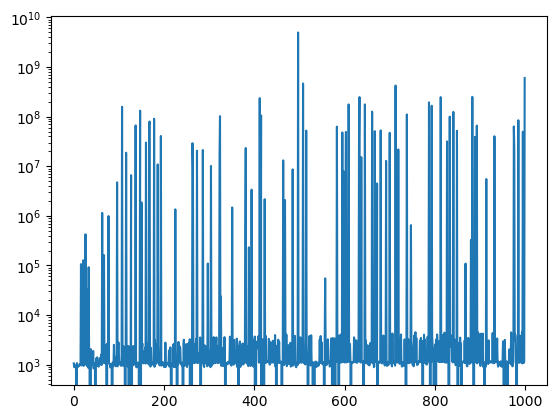

In [39]:
wass1d = best_params_lr['wasserstein_1d']

plt.plot(-wass1d)
plt.yscale('log')

We consider only points corresponding to loss metric lower than 10^{-4}

In [40]:
df = best_params_lr.loc[best_params_lr['wasserstein_1d'] < -1e+4]
#df = df.loc[df['wasserstein_1d'] > -1e9]

df.sort_values('wasserstein_1d')

,wasserstein_1d,config/gan/generator_lr,config/gan/discriminator_lr
497,-4.973906e+09,0.000011,0.099663
999,-6.030898e+08,0.000011,0.099588
508,-4.652679e+08,0.000011,0.099417
713,-4.227892e+08,0.000017,0.099747
883,-2.504708e+08,0.000015,0.099971
...,...,...,...
557,-5.491419e+04,0.000194,0.099955
31,-3.311288e+04,0.000485,0.053659
326,-2.362633e+04,0.000424,0.077539
30,-1.705656e+04,0.000720,0.082995


Plot the points: yellow points corresponds to low loss metric

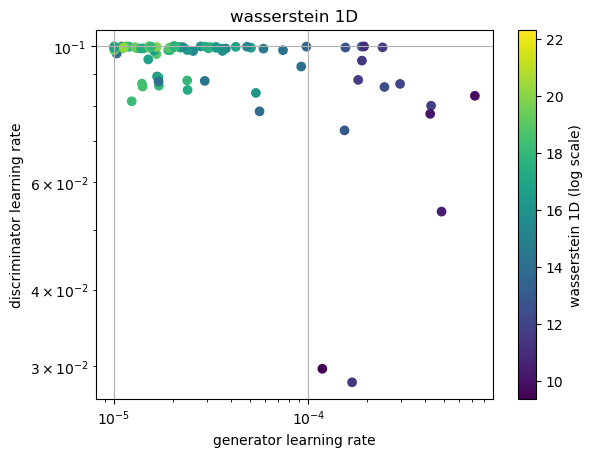

In [41]:
gen_lr = df['config/gan/generator_lr']
dis_lr = df['config/gan/discriminator_lr']
y = np.log(-df['wasserstein_1d'])

plt.scatter(gen_lr, dis_lr, c=y, cmap='viridis')  # You can change the colormap as per your preference
plt.colorbar(label='wasserstein 1D (log scale)')  # Adding color bar to indicate dependent variable
plt.xlabel('generator learning rate')
plt.ylabel('discriminator learning rate')
plt.title('wasserstein 1D')
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.show()

Low values of generator_learning_rate are better. 
High values of discriminator_learning_rate are fine.

Let us zoom in the upper-left portion of the graph.

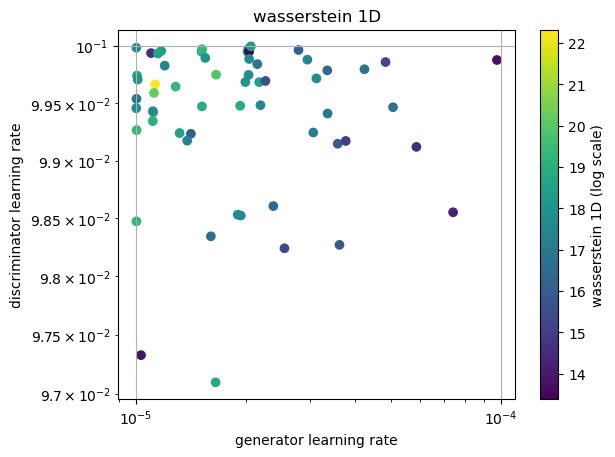

In [42]:
df = df.loc[df['config/gan/generator_lr'] < 1e-4]
df = df.loc[df['config/gan/discriminator_lr'] > 9.6e-2]

gen_lr = df['config/gan/generator_lr']
dis_lr = df['config/gan/discriminator_lr']
y = np.log(-df['wasserstein_1d'])

plt.scatter(gen_lr, dis_lr, c=y, cmap='viridis')  # You can change the colormap as per your preference
plt.colorbar(label='wasserstein 1D (log scale)')  # Adding color bar to indicate dependent variable
plt.xlabel('generator learning rate')
plt.ylabel('discriminator learning rate')
plt.title('wasserstein 1D')
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.show()

We choose the yellow point for the optimal generator and discriminator learning rates.

In [43]:
df.sort_values('wasserstein_1d').iloc[0]

wasserstein_1d                -4.973906e+09
config/gan/generator_lr        1.128485e-05
config/gan/discriminator_lr    9.966275e-02
Name: 497, dtype: float64

In [44]:
best_generator_lr, best_discriminator_lr = df.sort_values('wasserstein_1d').iloc[0][['config/gan/generator_lr','config/gan/discriminator_lr']]
best_generator_lr, best_discriminator_lr

(1.1284848297057308e-05, 0.0996627458492582)

(1.1284848297057308e-05, 0.0996627458492582)